In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sortedcontainers import SortedDict as od
from decimal import Decimal
from functions import generate_volumebars, read_trades, read_book
from book_features import get_features, wide_book, get_wb_cols
import warnings
warnings.filterwarnings('ignore')



In [17]:
df = pd.read_csv('data/20221118.csv.gz', compression='gzip')

In [19]:
df.symbol.unique()

array(['ADAUSD', 'ADAUSDT', 'ADAZ22', 'APEUSDT', 'APE_USDT', 'APTUSD',
       'APTUSDT', 'AVAXUSD', 'AVAXUSDT', 'AXSUSD', 'AXS_USDT', 'BCHUSD',
       'BCHUSDT', 'BMEXUSD', 'BMEXUSDT', 'BMEX_USDT', 'BNBUSD', 'BNBUSDT',
       'CROUSD', 'CROUSDT', 'DOGEUSD', 'DOGEUSDT', 'DOTUSD', 'DOTUSDT',
       'EOSUSD', 'ETHPOWZ22', 'ETHUSD', 'ETHUSDT', 'ETHUSDTZ22',
       'ETHUSDZ22', 'ETHUSDZ22_ETH', 'ETHUSD_ETH', 'ETHZ22', 'ETH_USDT',
       'ETH_XBT', 'EURUSD', 'EURUSDT', 'GMTUSD', 'GMTUSDT', 'KLAYUSD',
       'KLAYUSDT', 'LINKUSD', 'LINK_USDT', 'LTCUSD', 'LTCUSDT', 'LUNAUSD',
       'LUNAUSDT', 'MATICUSDT', 'MATIC_USDT', 'NEARUSD', 'SOLUSD',
       'SOLUSDT', 'SOL_USDT', 'TRX_USDT', 'UNI_USDT', 'USDTINR',
       'USDTTRY', 'USDTZAR', 'XBTEUR', 'XBTH23', 'XBTM23', 'XBTUSD',
       'XBTUSDT', 'XBTUSDTH23', 'XBTUSDTZ22', 'XBTX22', 'XBTZ22',
       'XBT_USDT', 'XRPUSD', 'XRPUSDT', 'XRPZ22'], dtype=object)

In [20]:
df = df[df.symbol == 'XBT_USDT']

<AxesSubplot: >

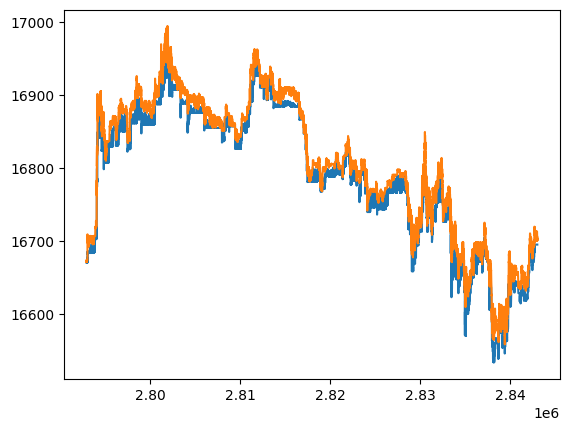

In [31]:
df.bidPrice.plot()
df.askPrice.plot()


<AxesSubplot: >

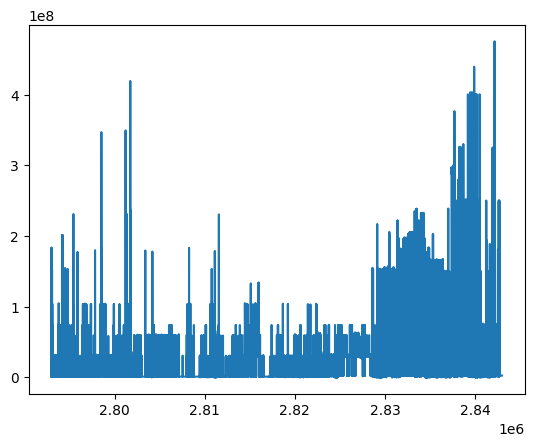

In [28]:
df.bidSize.plot()

In [154]:
df = pd.read_csv('data/book-BINANCE_FUTURES-BTC-USDT-PERP.csv', header=None, index_col=False)
df.columns = ['timestamp', 'feed', 'symbol', 'ask', 'bid']

In [155]:
df.iloc[0]['ask']

"{Decimal('16554.40'): Decimal('10.474'), Decimal('16554.50'): Decimal('0.235'), Decimal('16554.70'): Decimal('0.045'), Decimal('16554.80'): Decimal('0.001'), Decimal('16554.90'): Decimal('0.655'), Decimal('16555.00'): Decimal('1.747'), Decimal('16555.10'): Decimal('0.515'), Decimal('16555.20'): Decimal('0.001'), Decimal('16555.30'): Decimal('0.077'), Decimal('16555.40'): Decimal('4.629')}"

In [156]:
def wide_book_csv(df):
    odict_list = []
    odict = od({})

    for ix, row in df.iterrows():
        odict.update({"timestamp": row["timestamp"]})
        for index, i in enumerate(zip(eval(row["ask"]).items(), sorted(eval(row["bid"]).items(), reverse=True))):
            odict.update({f"asks[{index}].price": f"{i[0][0]}"})
            odict.update({f"asks[{index}].size": f"{i[0][1]}"})
            odict.update({f"bids[{index}].price": f"{i[1][0]}"})
            odict.update({f"bids[{index}].size": f"{i[1][1]}"})
        odict_list.append(odict.copy())

    df = pd.DataFrame(odict_list)
    df["date"] = pd.to_datetime(df["timestamp"], unit="s")
    df.set_index(df["date"], inplace=True)
#     df.drop(["timestamp"], axis=1, inplace=True)
    df = df.apply(pd.to_numeric)
    return df

In [157]:
df2 = wide_book_csv(df)
df2.head()

,asks[0].price,asks[0].size,asks[1].price,asks[1].size,asks[2].price,asks[2].size,asks[3].price,asks[3].size,asks[4].price,asks[4].size,...,bids[6].price,bids[6].size,bids[7].price,bids[7].size,bids[8].price,bids[8].size,bids[9].price,bids[9].size,timestamp,date
date,,,,,,,,,,,,,,,,,,,,,
2022-11-20 16:30:23.680999994,16554.4,10.474,16554.5,0.235,16554.7,0.045,16554.8,0.001,16554.9,0.655,...,16553.6,0.001,16553.5,0.008,16553.4,0.02,16553.3,0.277,1.668962e+09,1668961823680999994
2022-11-20 16:30:23.742000103,16554.4,10.474,16554.5,0.235,16554.7,0.045,16554.8,0.001,16554.9,0.655,...,16553.6,0.001,16553.5,0.008,16553.4,0.02,16553.3,0.277,1.668962e+09,1668961823742000103
2022-11-20 16:30:23.842999935,16554.4,10.028,16554.5,0.235,16554.7,0.045,16554.8,0.001,16554.9,0.655,...,16553.6,0.001,16553.5,0.008,16553.4,0.02,16553.3,0.277,1.668962e+09,1668961823842999935
2022-11-20 16:30:23.942999840,16554.4,9.811,16554.5,0.235,16554.7,0.045,16554.9,0.655,16555.0,1.747,...,16553.6,0.001,16553.5,0.008,16553.4,0.02,16553.3,0.277,1.668962e+09,1668961823942999840
2022-11-20 16:30:24.043999910,16554.4,9.796,16554.5,0.235,16554.7,0.045,16554.9,0.655,16555.0,1.747,...,16553.6,0.001,16553.5,0.008,16553.4,0.02,16553.3,0.377,1.668962e+09,1668961824043999910


<AxesSubplot: xlabel='date'>

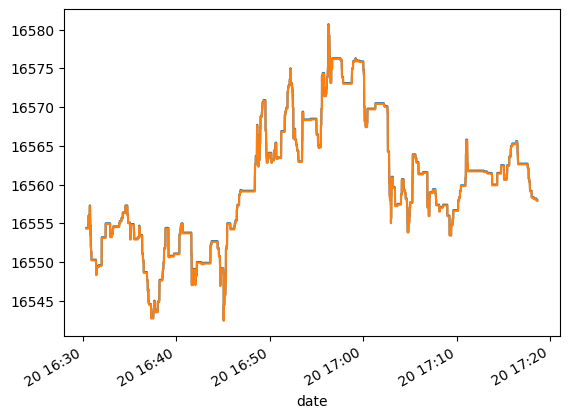

In [169]:
df2['asks[0].price'][df2.index < "2022-11-20 17:30:00"].plot()
df2['bids[0].price'][df2.index < "2022-11-20 17:30:00"].plot()

<AxesSubplot: xlabel='date'>

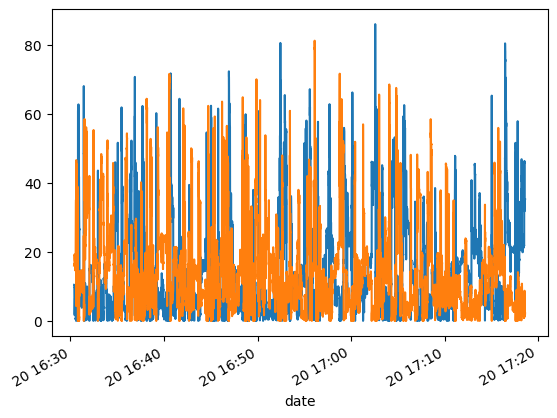

In [170]:
df2['asks[0].size'][df2.index < "2022-11-20 17:30:00"].plot()
df2['bids[0].size'][df2.index < "2022-11-20 17:30:00"].plot()